In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import shap
import joblib
import xgboost as xgb


In [2]:
default_path = '../../jiyoon/asset/default/mhcld_puf_2022.csv'
processed1_path = '../../jiyoon/asset/prepro3/Îã®ÏàúÍ≤∞Ï∏°Ïπò ÌñâÎßå Ï∂îÏ∂ú.csv'
processed2_path = '../../jiyoon/asset/prepro3/Îã®ÏàúÍ≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞.csv'
processed3_path = '../../jiyoon/asset/prepro3/Îã®ÏàúÍ≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞ ÌõÑ ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥ ÏûàÎäî ÏπºÎüº Ï†úÍ±∞.csv'
processed4_path = '../../jiyoon/asset/prepro3/Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú Î™®Îì† Ìñâ Ï†úÍ±∞.csv'
processed5_path = '../../jiyoon/asset/prepro3/ÏõêÌï´Ïù∏ÏΩîÎî©_Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú Î™®Îì† Ìñâ Ï†úÍ±∞.csv'
processed6_path = '../../jiyoon/asset/prepro3/ÏõêÌï´Ïù∏ÏΩîÎî©_Îã®ÏàúÍ≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞ ÌõÑ ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥ ÏûàÎäî ÏπºÎüº Ï†úÍ±∞.csv'

In [3]:
dataset3 = pd.read_csv(processed3_path)

## 6.ÏπòÎ£åÍ∏∞Í¥Ä Î∂ÑÏÑù

### 1. Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö© ÌòÑÌô© Î∂ÑÏÑù




In [4]:
# Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö©Ïûê Ïàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞

# Í∏∞Í¥Ä Î≥ÄÏàò Î™©Î°ù
service_cols = ['SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE']

# Í∞Å Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö©Ïûê Ïàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
for col in service_cols:
    print(f"\n {col} Ïù¥Ïö©Ïûê ÌòÑÌô©")
    print(dataset3[col].value_counts(dropna=False))
    print(dataset3[col].value_counts(normalize=True, dropna=False).map(lambda x: f"{x:.2%}"))



 SPHSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
SPHSERVICE
0    5231293
1      86317
Name: count, dtype: int64
SPHSERVICE
0    98.38%
1     1.62%
Name: proportion, dtype: object

 CMPSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
CMPSERVICE
1    5160631
0     156979
Name: count, dtype: int64
CMPSERVICE
1    97.05%
0     2.95%
Name: proportion, dtype: object

 OPISERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
OPISERVICE
0    5073946
1     243664
Name: count, dtype: int64
OPISERVICE
0    95.42%
1     4.58%
Name: proportion, dtype: object

 RTCSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
RTCSERVICE
0    5259532
1      58078
Name: count, dtype: int64
RTCSERVICE
0    98.91%
1     1.09%
Name: proportion, dtype: object

 IJSSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
IJSSERVICE
0    5271913
1      45697
Name: count, dtype: int64
IJSSERVICE
0    99.14%
1     0.86%
Name: proportion, dtype: object


In [5]:
# Í∞úÏù∏Î≥Ñ Í∏∞Í¥Ä Ïù¥Ïö© Í∞úÏàò Î≥ÄÏàò ÏÉùÏÑ±

# Ïù¥Ïö©Ìïú Í∏∞Í¥Ä Ïàò (1Í∞íÎßå Ïπ¥Ïö¥Ìä∏)
dataset3['NUM_SERVICES_USED'] = (dataset3[service_cols] == 1).sum(axis=1)

# Î∂ÑÌè¨ ÌôïÏù∏
print(dataset3['NUM_SERVICES_USED'].value_counts().sort_index())



NUM_SERVICES_USED
1    5062839
2     233880
3      19803
4       1061
5         27
Name: count, dtype: int64


In [6]:
# Í∏∞Í¥ÄÏù¥Ïö© Ï°∞Ìï© ÌÉêÏÉâ

# Í∏∞Í¥Ä Ïù¥Ïö© Ï°∞Ìï© (ex: '01001' ‚Üí Í∞Å Í∏∞Í¥Ä Ïù¥Ïö©Ïó¨Î∂ÄÎ•º Î¨∏ÏûêÏó¥Î°ú Î¨∂Í∏∞)
# Í∞Å ÏÑúÎπÑÏä§ Ïù¥Ïö© Ïó¨Î∂ÄÎ•º ÎπÑÌä∏ ÏûêÎ¶¨Î°ú Í∞ÑÏ£ºÌïòÏó¨ Ïù¥ÏßÑÏàòÎ°ú Ïù∏ÏΩîÎî© (01001 ‚Üí 9)
dataset3['SERVICE_PATTERN_NUM'] = dataset3[service_cols].dot(1 << np.arange(len(service_cols)-1, -1, -1))

# Ïù¥ÏßÑ Ìå®ÌÑ¥ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (ÏÑ†ÌÉùÏÇ¨Ìï≠)
dataset3['SERVICE_PATTERN'] = dataset3['SERVICE_PATTERN_NUM'].apply(lambda x: format(x, f'0{len(service_cols)}b'))


# Ï°∞Ìï©Î≥Ñ ÎπàÎèÑ
print(dataset3['SERVICE_PATTERN'].value_counts().head(10))


SERVICE_PATTERN
01000    4910437
01100     138470
00100      83485
11000      43024
10000      30625
01001      24096
01010      23926
00010      21053
00001      17239
01110       8733
Name: count, dtype: int64


Step 1. ÏπòÎ£åÍ∏∞Í¥Ä Ïù¥Ïö© ÌòÑÌô© Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

1-1. Í∞Å Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö©Î•†

- **CMPSERVICE** (ÏßÄÏó≠ÏÇ¨Ìöå Í∏∞Î∞ò Ï†ïÏã†Í±¥Í∞ï ÏÑúÎπÑÏä§) Ïù¥Ïö©ÏûêÍ∞Ä Ï†ÑÏ≤¥Ïùò **97.05%**Î°ú Í∞ÄÏû• ÎßéÏïòÏúºÎ©∞, Ïù¥Îäî ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä **ÎπÑÏûÖÏõêÌòï, Ïô∏Îûò Ï§ëÏã¨ ÏπòÎ£å**Î•º Î∞õÏùÄ Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.
- **OPISERVICE** (Í∏∞ÌÉÄ Ï†ïÏã†Í≥º ÏûÖÏõê ÏãúÏÑ§) Ïù¥Ïö©ÏûêÎäî **4.58%**, ÎπÑÍµêÏ†Å ÎÇÆÏßÄÎßå ÏûÖÏõê ÏπòÎ£å Í≤ΩÌñ•ÏùÑ Î∞òÏòÅÌïúÎã§.
- **SPHSERVICE** (Ï£ºÎ¶Ω Ï†ïÏã†Î≥ëÏõê): **1.62%**ÎßåÏù¥ Ïù¥Ïö©, Îß§Ïö∞ Ï†úÌïúÏ†Å.
- **RTCSERVICE** (Í±∞Ï£º ÏπòÎ£å ÏÑºÌÑ∞): **1.09%**Î°ú ÏùºÎ∂Ä Ïû•Í∏∞ Ï£ºÍ±∞ ÏπòÎ£å Ï§ëÏã¨.
- **IJSSERVICE** (ÍµêÏ†ïÏãúÏÑ§ ÎÇ¥ ÏπòÎ£å): **0.86%**, ÎπÑÏú®ÏùÄ Ï†ÅÏúºÎÇò ÏÇ¨ÌöåÏ†ÅÏúºÎ°ú ÌäπÏàòÌïú ÌôòÍ≤ΩÏûÑ.

‚û°Ô∏è Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú **ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Îäî Ïô∏Îûò Ï§ëÏã¨Ïùò ÏßÄÏó≠ÏÇ¨Ìöå Í∏∞Î∞ò Í∏∞Í¥Ä(CMPSERVICE)Îßå Ïù¥Ïö©**ÌïòÍ≥† ÏûàÏúºÎ©∞, ÏûÖÏõê ÏπòÎ£åÎÇò ÌäπÏàò ÏãúÏÑ§ Ïù¥Ïö©ÏùÄ Ï†úÌïúÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ®.

---

1-2. ÏπòÎ£åÍ∏∞Í¥Ä ÎèôÏãú Ïù¥Ïö© Í∞úÏàò

- Ìïú ÏÇ¨ÎûåÏù¥ Ïù¥Ïö©Ìïú Í∏∞Í¥Ä ÏàòÎ•º Ìï©ÏÇ∞Ìïú Í≤∞Í≥º:
  - **1Í∞ú Í∏∞Í¥ÄÎßå Ïù¥Ïö©**Ìïú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä **ÏïΩ 95.0% (5,062,839Î™Ö)** Î°ú Í∞ÄÏû• ÎßéÏùå
  - **2Í∞ú Í∏∞Í¥Ä ÎèôÏãú Ïù¥Ïö©**: 233,880Î™Ö (ÏïΩ 4.4%)
  - **3Í∞ú Ïù¥ÏÉÅ** ÎèôÏãú Ïù¥Ïö©ÏûêÎèÑ ÏÜåÏàò Ï°¥Ïû¨ (ÏµúÎåÄ 5Í∞ú Ïù¥Ïö©ÏûêÎèÑ 27Î™Ö ÏûàÏùå)

‚û°Ô∏è ÎåÄÎ∂ÄÎ∂ÑÏùÄ Îã®Ïùº Í∏∞Í¥Ä Ïù¥Ïö©ÏûêÏßÄÎßå, **Ï§ëÎ≥µ ÏÑúÎπÑÏä§ ÏàòÌòúÏûêÎèÑ Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï°¥Ïû¨**ÌïòÏó¨, Ïù¥Îì§Ïóê ÎåÄÌïú ÌõÑÏÜç Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï®.

---

1-3. Í∏∞Í¥Ä Ïù¥Ïö© Ìå®ÌÑ¥ (Ï°∞Ìï©)

ÏÉÅÏúÑ 10Í∞úÏùò Í∏∞Í¥Ä Ïù¥Ïö© Ï°∞Ìï©ÏùÑ Î≥¥Î©¥:

| Ìå®ÌÑ¥ | ÏùòÎØ∏ | Ïù∏Ïõê |
|-------|------|------|
| `01000` | CMPSERVICEÎßå Ïù¥Ïö© | **4,910,437Î™Ö** |
| `01100` | CMPSERVICE + OPISERVICE | 138,470Î™Ö |
| `00100` | OPISERVICEÎßå Ïù¥Ïö© | 83,485Î™Ö |
| `11000` | SPHSERVICE + CMPSERVICE | 43,024Î™Ö |
| `10000` | SPHSERVICEÎßå Ïù¥Ïö© | 30,625Î™Ö |
| `01001` | CMPSERVICE + IJSSERVICE | 24,096Î™Ö |
| `01010` | CMPSERVICE + RTCSERVICE | 23,926Î™Ö |
| `00010` | RTCSERVICEÎßå Ïù¥Ïö© | 21,053Î™Ö |
| `00001` | IJSSERVICEÎßå Ïù¥Ïö© | 17,239Î™Ö |
| `01110` | CMPSERVICE + OPISERVICE + RTCSERVICE | 8,733Î™Ö |

‚û°Ô∏è Í∞ÄÏû• ÌùîÌïú Ìå®ÌÑ¥ÏùÄ **CMPSERVICE Îã®ÎèÖ Ïù¥Ïö©(01000)**Ïù¥Î©∞,  
Í∑∏ Ïô∏ÏóêÎäî CMPSERVICEÎ•º Í∏∞Î∞òÏúºÎ°ú ÏûÖÏõêÌòï ÎòêÎäî ÌäπÏàòÍ∏∞Í¥ÄÏù¥ Ï°∞Ìï©ÎêòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùå.

---

ÏãúÏÇ¨Ï†ê

- ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Îäî **ÎπÑÏûÖÏõêÌòï Ïô∏Îûò ÏπòÎ£å Ï§ëÏã¨Ïùò ÏÑúÎπÑÏä§Îßå Ïù¥Ïö©**ÌïòÏßÄÎßå, ÏùºÎ∂Ä ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Îäî Îã§Ï§ëÍ∏∞Í¥ÄÏùÑ ÎèôÏãúÏóê Ïù¥Ïö©.
- ÌäπÌûà CMPSERVICEÏôÄ OPISERVICE, RTCSERVICE Îì±Ïùò Ï°∞Ìï©ÏùÄ **Ïã¨Ìôî ÏπòÎ£å, Î≥µÌï© ÏÉÅÌÉú**, ÎòêÎäî **ÌäπÏàòÌïú ÏÉÅÌô©(ÍµêÏ†ïÏãúÏÑ§ Îì±)**ÏùÑ Î∞òÏòÅÌï† Ïàò ÏûàÏñ¥ **ÏÑ∏Î∂Ä ÌäπÏÑ± Î∂ÑÏÑùÏù¥ ÌïÑÏöî**Ìï®.
- Ï∂îÌõÑ Î∂ÑÏÑùÏóêÏÑúÎäî Ïù¥ `NUM_SERVICES_USED` Î≥ÄÏàòÏôÄ Í∏∞Í¥Ä Ï°∞Ìï© Ìå®ÌÑ¥ÏùÑ ÌôúÏö©Ìï¥:
  - **ÏûÖÏõê Ïó¨Î∂Ä ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±**
  - **Îã§Ï§ë Ïù¥Ïö©ÏûêÏôÄ Îã®Ïùº Ïù¥Ïö©Ïûê ÎπÑÍµê**
  - **Í∏∞Í¥Ä ÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏ Î∂ÑÏÑù** Îì±ÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏùå.


### 2. ÏûÖÏõê Í≤ΩÌóò ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± Î∞è ÎπÑÍµêÎ∂ÑÏÑù

SPHSERVICE, OPISERVICE, RTCSERVICE Ï§ë ÌïòÎÇòÎùºÎèÑ Ïù¥Ïö©Ìïú Í≤ΩÏö∞ ‚Üí ÏûÖÏõê ÏπòÎ£å Í≤ΩÌóòÏù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú Í∞ÑÏ£º

ÌååÏÉù Î≥ÄÏàò INPATIENTÎ•º ÎßåÎì§Ïñ¥ÏÑú:

Ïù∏Íµ¨ÌÜµÍ≥ÑÏ†Å ÌäπÏÑ±(AGE, GENDER Îì±)

ÏßÑÎã® Ïàò(NUMMHS), Î¨ºÏßàÏÇ¨Ïö©Î¨∏Ï†ú(SAP), Í≥†Ïö©ÏÉÅÌÉú(EMPLOY), Ï£ºÍ±∞ÏÉÅÌÉú(LIVARAG) Îì±Í≥ºÏùò Ï∞®Ïù¥Ï†ê Î∂ÑÏÑù

In [7]:
# IMPATIENT Î≥ÄÏàò ÏÉùÏÑ±
# ÏûÖÏõêÏπòÎ£å Í¥ÄÎ†® ÏÑúÎπÑÏä§ Ï§ë ÌïòÎÇòÎùºÎèÑ Ïù¥Ïö©Ìïú Í≤ΩÏö∞ 1, ÏïÑÎãàÎ©¥ 0
dataset3['INPATIENT'] = (
    (dataset3['SPHSERVICE'] == 1) |
    (dataset3['OPISERVICE'] == 1) |
    (dataset3['RTCSERVICE'] == 1)
).astype(int)

# Î∂ÑÌè¨ ÌôïÏù∏
print(dataset3['INPATIENT'].value_counts())
print(dataset3['INPATIENT'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))



INPATIENT
0    4951772
1     365838
Name: count, dtype: int64
INPATIENT
0    93.12%
1     6.88%
Name: proportion, dtype: object


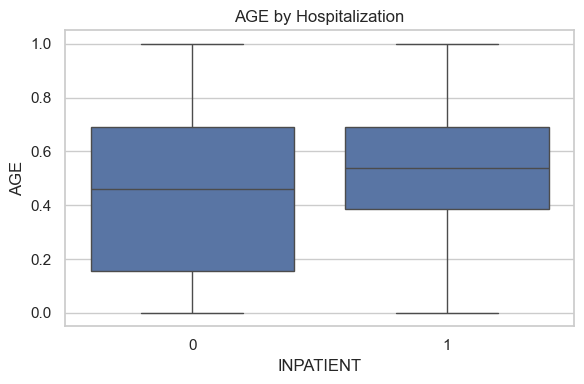

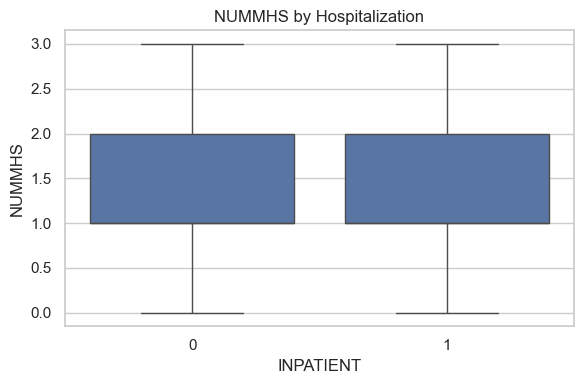

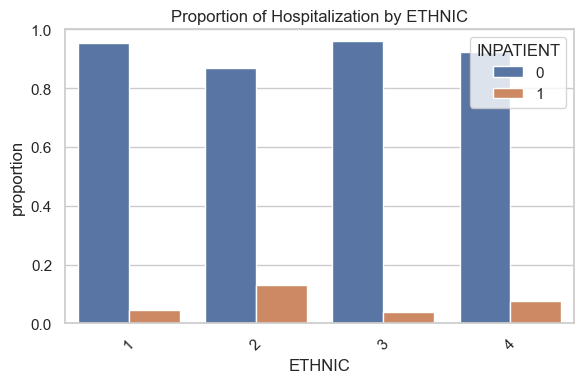

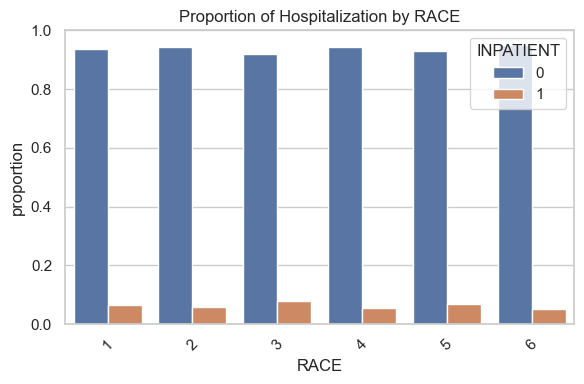

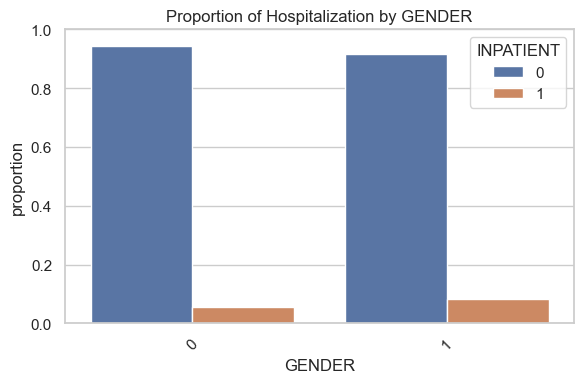

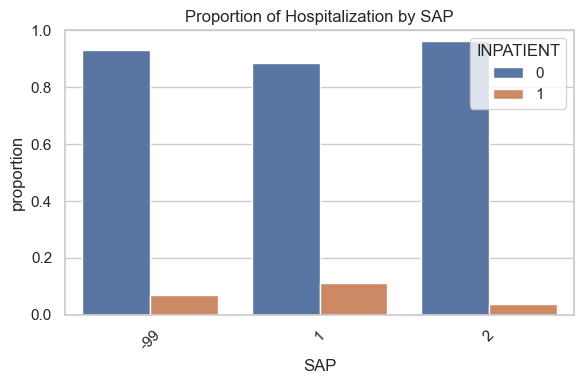

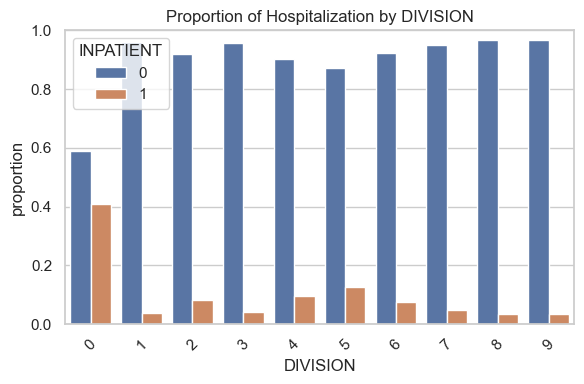

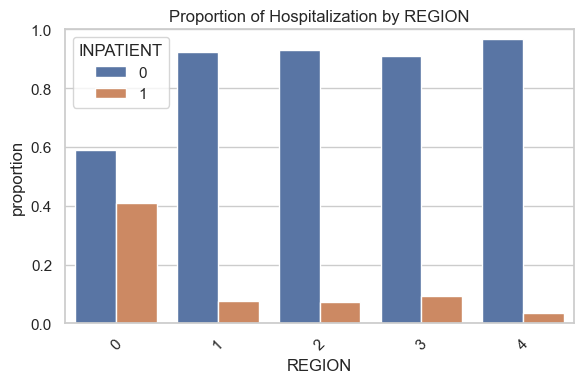

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ÏûÖÏõê Ïó¨Î∂Ä Î≥ÄÏàòÎ™Ö
target_col = 'INPATIENT'

# ÏàòÏπòÌòï / Î≤îÏ£ºÌòï Î≥ÄÏàò
numeric_cols = ['AGE', 'NUMMHS']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò
categorical_cols = ['ETHNIC', 'RACE', 'GENDER', 'SAP', 'DIVISION', 'REGION']  # Î≤îÏ£ºÌòï Î≥ÄÏàò

sns.set(style="whitegrid")
n_cols = 2  # Ìïú Ï§ÑÏóê 2Í∞úÏî© (boxplot Ïö©)

### 1. Ïó∞ÏÜçÌòï Î≥ÄÏàò ‚Üí Boxplot (Í∏∞Ï°¥ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=col, data=dataset3)
    plt.title(f"{col} by Hospitalization")
    plt.tight_layout()
    plt.show()

### 2. Î≤îÏ£ºÌòï Î≥ÄÏàò ‚Üí ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
for col in categorical_cols:
    # ÎπÑÏú® Í≥ÑÏÇ∞
    prop_df = (
        dataset3
        .groupby(col)[target_col]
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 4))
    sns.barplot(data=prop_df, x=col, y='proportion', hue=target_col)
    plt.title(f"Proportion of Hospitalization by {col}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


ÏûÖÏõê ÏπòÎ£å Í≤ΩÌóò Î∂ÑÏÑù

 1. INPATIENT Î≥ÄÏàò Í∞úÏöî

- `SPHSERVICE`, `OPISERVICE`, `RTCSERVICE` Ï§ë ÌïòÎÇò Ïù¥ÏÉÅ Ïù¥Ïö©Ìïú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Î•º ÏûÖÏõê ÏπòÎ£å Í≤ΩÌóòÏûêÎ°ú Ï†ïÏùòÌïòÏó¨ `INPATIENT` Î≥ÄÏàò ÏÉùÏÑ±.
- Ï†ÑÏ≤¥ ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï§ë **ÏïΩ 6.88%**Í∞Ä ÏûÖÏõê Í≤ΩÌóòÏù¥ ÏûàÏóàÏúºÎ©∞, ÎÇòÎ®∏ÏßÄ **93.12%Îäî Ïô∏Îûò ÏπòÎ£åÎßå Î∞õÏùå**.

| Íµ¨Î∂Ñ | Ïù∏ÏõêÏàò | ÎπÑÏú® |
|------|--------|------|
| ÏûÖÏõê Í≤ΩÌóò ÏóÜÏùå (`INPATIENT=0`) | 4,951,772Î™Ö | 93.12% |
| ÏûÖÏõê Í≤ΩÌóò ÏûàÏùå (`INPATIENT=1`) |   365,838Î™Ö |  6.88% |

---

 2. Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê Îî∞Î•∏ ÏûÖÏõê Ïó¨Î∂Ä Ï∞®Ïù¥

- **AGE (Ïó∞Î†π)**:
  - ÏûÖÏõê Í≤ΩÌóòÏù¥ ÏûàÎäî Í∑∏Î£πÏùò Ïó∞Î†π Ï§ëÏïôÍ∞íÏù¥ Îçî ÎÜíÍ≤å ÎÇòÌÉÄÎÇ®.
  - ‚Üí **ÏûÖÏõê ÏπòÎ£åÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïó∞Î†πÏù¥ ÎÜíÏùÄ ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ÏóêÍ≤å Îçî ÎπàÎ≤àÌûà Ï†ÅÏö©Îê®**.

- **NUMMHS (Ï†ïÏã†ÏßàÌôò ÏßÑÎã® Ïàò)**:
  - ÏûÖÏõê/ÎπÑÏûÖÏõê ÏßëÎã® Î™®Îëê ÌèâÍ∑† 2Í∞ú ÎØ∏ÎßåÏùò ÏßÑÎã®ÏùÑ Î∞õÏïòÍ≥†, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏùå. 

---

3. Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ ÏûÖÏõê ÎπÑÏú® ÎπÑÍµê

üîπ ETHNIC (ÌûàÏä§Ìå®Îãâ Ïó¨Î∂Ä)
- Ìë∏ÏóêÎ•¥ÌÜ†Î¶¨ÏΩî Ï∂úÏã†(2Î≤à)Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏïòÏúºÎ©∞, Îã§Î•∏ Í∑∏Î£π ÎåÄÎπÑ ÏïΩ **10~15% ÏàòÏ§ÄÏùò Ï∞®Ïù¥**Í∞Ä Ï°¥Ïû¨.

üîπ RACE (Ïù∏Ï¢Ö)
- Ï†Ñ Ïù∏Ï¢Ö Í∑∏Î£πÏóêÏÑú ÏûÖÏõê Í≤ΩÌóò ÎπÑÏú®ÏùÄ 10% ÎØ∏ÎßåÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏóàÏúºÎÇò,
- ÏùºÎ∂Ä ÏÜåÏàò Ïù∏Ï¢Ö Í∑∏Î£πÏóêÏÑú ÏÜåÌè≠ ÎÜíÏùÄ ÏûÖÏõê ÎπÑÏú® Í¥ÄÏ∏°.

üîπ GENDER (ÏÑ±Î≥Ñ)
- **Ïó¨ÏÑ±(1Î≤à)Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ ÎÇ®ÏÑ±Î≥¥Îã§ Îã§ÏÜå ÎÜíÏùå**.
- ÏÑ±Î≥ÑÏóê Îî∞Îùº ÏπòÎ£å Î∞©Ïãù Ï†ëÍ∑ºÏÑ±Ïù¥ Îã§Î•º Ïàò ÏûàÎäî Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨.

üîπ SAP (Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†ú Ïó¨Î∂Ä)
- **SAP=1 (Î¨∏Ï†ú ÏûàÏùå)** ÏßëÎã®Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùå.
- ‚Üí **Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†úÎäî ÏûÖÏõêÏπòÎ£å Í∞ÄÎä•ÏÑ±ÏùÑ ÎÜíÏù¥Îäî ÌïµÏã¨ ÏöîÏù∏** Ï§ë ÌïòÎÇòÎ°ú Î≥¥ÏûÑ.

üîπ DIVISION / REGION (Ïù∏Íµ¨Ï°∞ÏÇ¨ Íµ¨Ïó≠)
- ÌäπÏ†ï ÏßÄÏó≠(Ïòà: `DIVISION=0`, `REGION=0`)Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ Îß§Ïö∞ ÎÜíÏùå.
- ‚Üí **ÏßÄÏó≠ Í∞Ñ ÏùòÎ£å Ï†ëÍ∑ºÏÑ±, Ï†ïÏ±Ö Ï∞®Ïù¥, Î≥¥Í≥† Í¥ÄÌñâ**Ïù¥ ÏûÖÏõê ÌôïÎ•†Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùå.

---

 ÏöîÏïΩ Î∞è ÏãúÏÇ¨Ï†ê

- ÏûÖÏõê ÏπòÎ£åÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú **ÎÇòÏù¥Í∞Ä ÎßéÍ≥†**, **Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†úÍ∞Ä ÏûàÎäî ÏÇ¨Îûå**ÏóêÍ≤å Îçî ÏûêÏ£º Î∞úÏÉù.
- ÎòêÌïú **ÏÑ±Î≥Ñ(GENDER)**, **Ï∂úÏã†(Ethnic/Race)**, **ÏßÄÏó≠(REGION/DIVISION)** ÏöîÏù∏ÎèÑ ÏûÖÏõê Ïó¨Î∂ÄÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.
- ‚Üí Ïù¥ÌõÑ Î∂ÑÏÑùÏóêÏÑú `INPATIENT`Î•º **ÏòàÏ∏° ÎåÄÏÉÅ Î≥ÄÏàòÎ°ú ÏßÄÏ†ï**ÌïòÍ≥†, Ï£ºÏöî ÏöîÏù∏ÏùÑ Í∑úÎ™ÖÌïòÍ∏∞ ÏúÑÌïú **Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÎòêÎäî Ìä∏Î¶¨ Î™®Îç∏** Î∂ÑÏÑùÏù¥ Í∞ÄÎä•.



### 3. Í∏∞Í¥Ä Ïù¥Ïö© Í∞úÏàòÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏ Î∂ÑÏÑù
ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä Ïù¥Ïö©Ìïú Í∏∞Í¥Ä Í∞úÏàò(NUM_SERVICES_USED)Í∞Ä Ïñ¥Îñ§ Î≥ÄÏàòÏóê ÏùòÌï¥ ÏòÅÌñ•ÏùÑ Î∞õÎäîÏßÄ Î∂ÑÏÑù

Îã®Ïàú ÎπÑÍµêÎ•º ÎÑòÏñ¥ÏÑú **ÏòàÏ∏° Í∞ÄÎä•Ìïú ÏöîÏù∏(ÎÇòÏù¥, ÏÑ±Î≥Ñ, ÏßÑÎã® Ïàò Îì±)**ÏùÑ ÏãùÎ≥Ñ



In [9]:
# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÎßåÎì§ Í≤ÉÏù¥ÎØÄÎ°ú ÏõêÌï´Ïù∏ÏΩîÎî©Îêú dataset6 ÏÇ¨Ïö©
dataset6 = pd.read_csv(processed6_path)

dataset6['NUM_SERVICES_USED'] = (dataset3[service_cols] == 1).sum(axis=1)
print(dataset6['NUM_SERVICES_USED'].value_counts().sort_index())



NUM_SERVICES_USED
1    5062839
2     233880
3      19803
4       1061
5         27
Name: count, dtype: int64


In [8]:
# ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
target_col = 'NUM_SERVICES_USED'
feature_col = ['AGE','GENDER', 'SAP', 'NUMMHS', 'DIVISION', 'REGION' ]



NUM_SERVICES_USED
1    5062839
2     233880
3      19803
4       1061
5         27
Name: count, dtype: int64

In [10]:
dataset6.columns

Index(['YEAR', 'AGE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE',
       'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3', 'SAP', 'NUMMHS',
       'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
       'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
       'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP', 'CASEID', 'RACE_2',
       'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'ETHNIC_2', 'ETHNIC_3',
       'ETHNIC_4', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'SUB_1',
       'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9',
       'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'SMISED_2', 'SMISED_3',
       'DETNLF_2', 'DETNLF_3', 'DETNLF_4', 'DETNLF_5', 'DETNLF_NotApplicable',
       'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5',
       'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9',
       'NUM_SERVICES_USED'],
      dtype='object')

In [11]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# ÏõêÌï´Ïù∏ÏΩîÎî©
# 2. 'True', 'False' Î¨∏ÏûêÏó¥ ‚Üí 1, 0 Î≥ÄÌôò
for col in dataset6.columns:
    if dataset6[col].dtype == object:
        if set(dataset6[col].dropna().unique()) <= {"True", "False"}:
            dataset6[col] = dataset6[col].map({"True": 1, "False": 0}).astype(int)

# 3. object ÌÉÄÏûÖ Ï†úÍ±∞
dataset6 = dataset6.drop(columns=dataset6.select_dtypes(include='object').columns)

# ‚úÖ 4. bool ÌÉÄÏûÖÏùÑ intÎ°ú Î≥ÄÌôò (SHAP Ïò§Î•ò Î∞©ÏßÄ)
dataset6 = dataset6.astype({col: int for col in dataset6.select_dtypes('bool').columns})

# 6. ÌÉÄÍ≤üÍ≥º ÌîºÏ≤ò Î∂ÑÎ¶¨
y = dataset6["NUM_SERVICES_USED"]
X = dataset6.drop(columns=["YEAR", "SPHSERVICE","CMPSERVICE","OPISERVICE","RTCSERVICE",'IJSSERVICE','NUM_SERVICES_USED','CASEID'], errors="ignore")

# ‚úÖ 7. Î™®Îì† ÌîºÏ≤ò float Ï≤òÎ¶¨ (SHAP Í≥ÑÏÇ∞ ÏïàÏ†ïÏÑ± ÌôïÎ≥¥)
X = X.astype(float)

# 8. Î™®Îç∏ ÌïôÏäµ
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
model.fit(X, y)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

PermutationExplainer explainer: 301it [00:53,  5.33it/s]                         



üîç SHAP Summary for Class 0


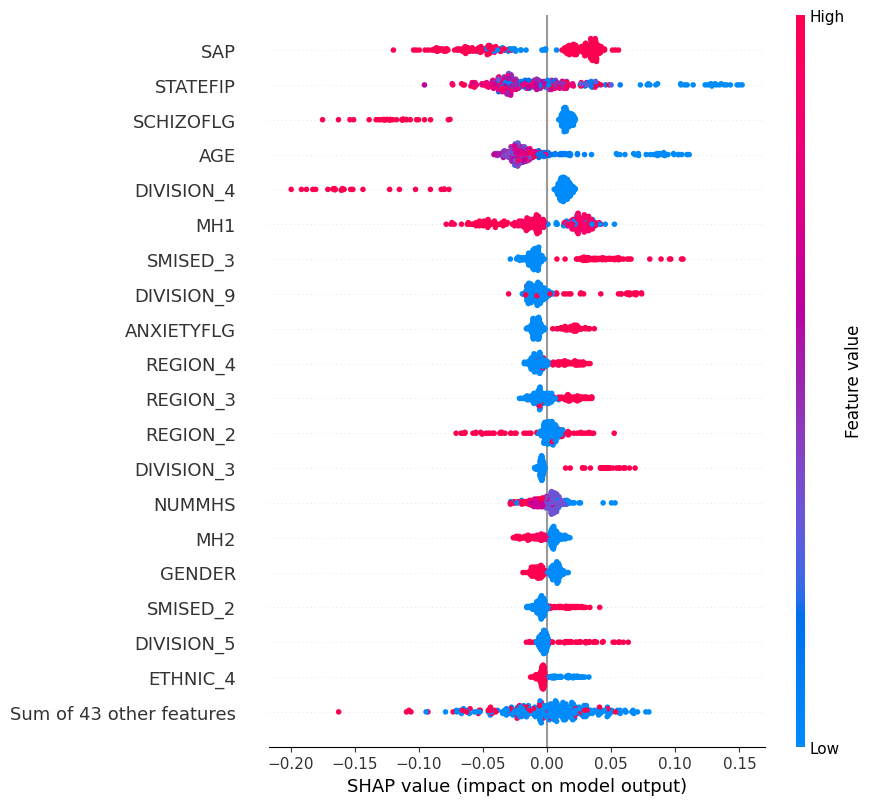


üîç SHAP Summary for Class 1


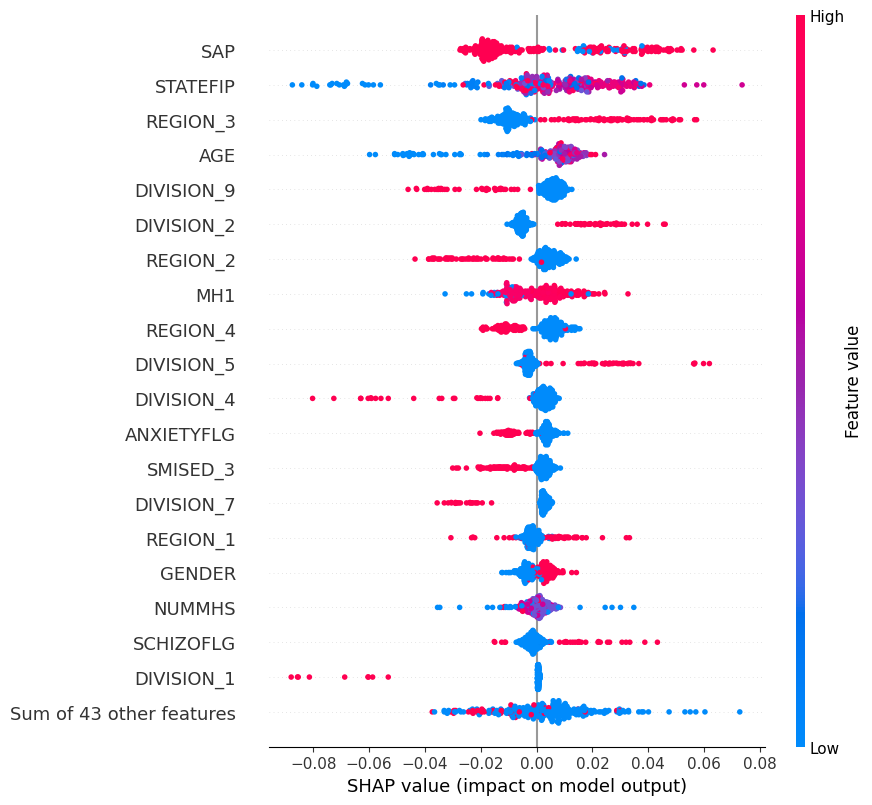


üîç SHAP Summary for Class 2


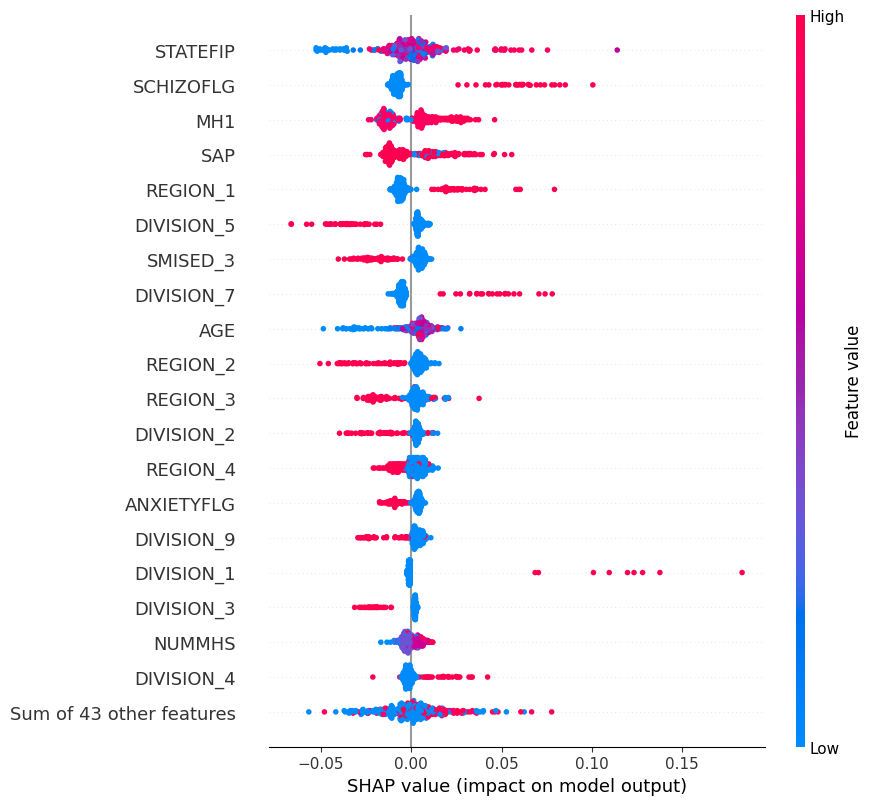


üîç SHAP Summary for Class 3


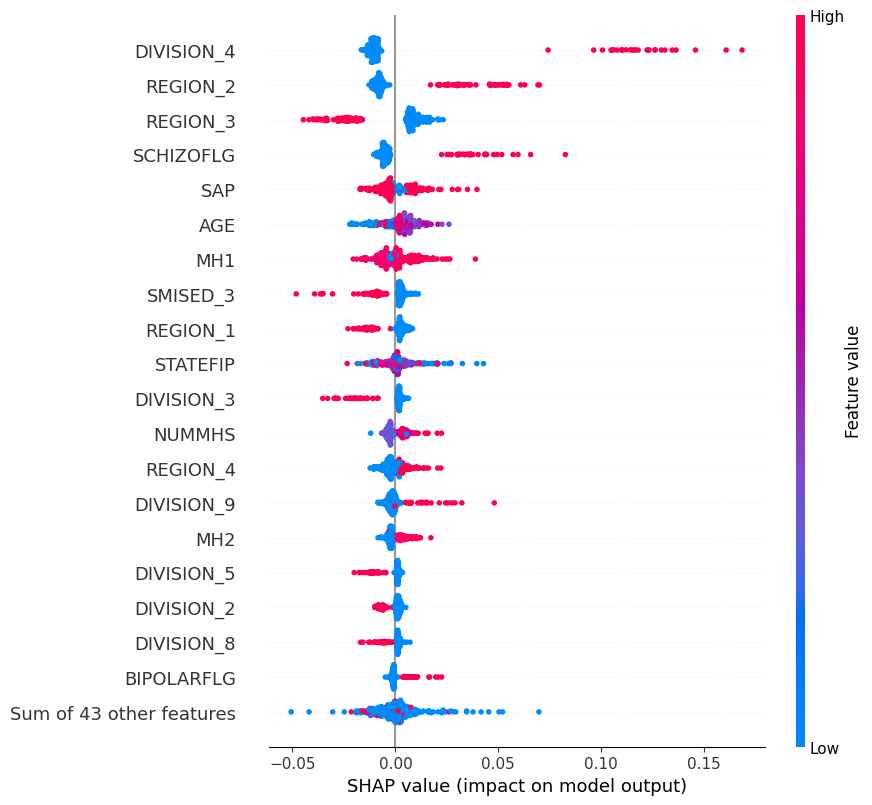


üîç SHAP Summary for Class 4


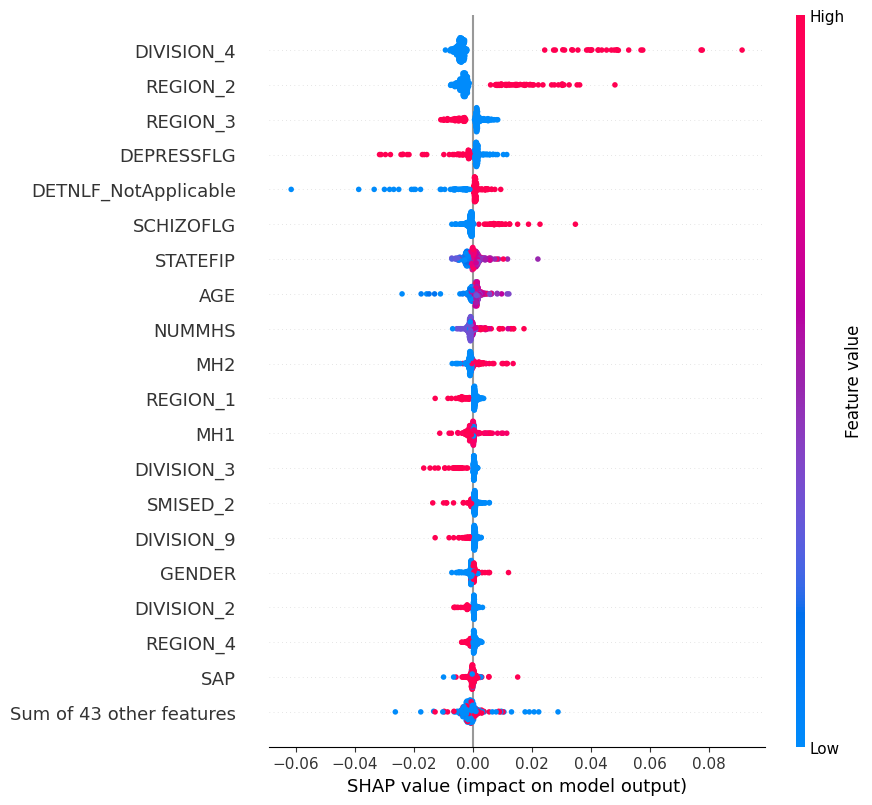

Ï†ïÌôïÎèÑ (Accuracy): 0.6797


In [12]:

from sklearn.metrics import accuracy_score


# 9. ÏÉòÌîå Ï∂îÏ∂ú (SHAP Í≥ÑÏÇ∞ ÏÜçÎèÑ ÏµúÏ†ÅÌôî)
X_sample = X.sample(n=300, random_state=42)

# 10. SHAP Explainer Ï†ïÏùò (predict_proba Í∏∞Î∞ò)
def predict_proba_fn(X_input):
    return model.predict_proba(X_input)

explainer = shap.Explainer(predict_proba_fn, X_sample)
shap_values = explainer(X_sample)

# 11. ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï†ïÏùò
class_ids = model.classes_
class_names = {i: f"{i+1}" for i in class_ids}

# 12. ÌÅ¥ÎûòÏä§Î≥Ñ SHAP summary plot
for i in range(shap_values.values.shape[2]):
    print(f"\nüîç SHAP Summary for Class {class_names.get(i, str(i))}")
    shap.plots.beeswarm(shap_values[:, :, i], max_display=20)

# ‚úÖ ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred = model.predict(X)

# ‚úÖ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
acc = accuracy_score(y, y_pred)
print(f"Ï†ïÌôïÎèÑ (Accuracy): {acc:.4f}")



Î∂ÑÏÑùÍ≤∞Í≥º

**1Í∞ú Í∏∞Í¥Ä Ïù¥Ïö©Ïûê (`NUM_SERVICES_USED = 1`)**

* **SAP**(Substance Abuse Problem): Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏòÅÌñ• ‚Üí SAPÍ∞Ä ÏûàÎäî ÏÇ¨ÎûåÏùºÏàòÎ°ù 1Í∞ú Í∏∞Í¥ÄÎßå Ïù¥Ïö©Ìïú ÏòàÏ∏° Ï¶ùÍ∞Ä
* **STATEFIP**: ÌäπÏ†ï Ï£º(State)Ïùò ÏòÅÌñ•Î†• ÎöúÎ†∑
* **SCHIZOFLG**: Ï°∞ÌòÑÎ≥ë ÏßÑÎã® Ïó¨Î∂ÄÍ∞Ä ÎÜíÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®
* **AGE**: ÎÇòÏù¥ Î∂ÑÌè¨ÎèÑ ÏòÅÌñ•ÏùÑ Ï§å (Ï§ëÍ∞Ñ Ïó∞Î†πÎåÄÏóê ÏòÅÌñ•Î†•)
* **MH1** (1Ï∞® Ï†ïÏã†ÏßàÌôò ÏΩîÎìú)ÎèÑ ÏòÅÌñ•Î†• ÏÉÅÏúÑ

üìù `1Í∞ú Í∏∞Í¥Ä Ïù¥Ïö©Ïûê`Îäî **Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†ú**ÏôÄ **ÌäπÏ†ï ÏßÑÎã® Ïú†Î¨¥**Ïóê Í∞ïÌïòÍ≤å Î∞òÏùëÌïòÎäî Í∑∏Î£π

---

**2Í∞ú Í∏∞Í¥Ä Ïù¥Ïö©Ïûê**

* `SAP`, `STATEFIP`, `REGION_3`, `AGE` Í∞Ä Ïó¨Ï†ÑÌûà ÏÉÅÏúÑ
* `DIVISION_9`, `DIVISION_2` Îì± ÏßÄÏó≠Ï†Å ÌäπÏÑ±Ïù¥ Í∞ïÏ°∞Îê®
* `MH1`, `REGION_4`, `ANXIETYFLG`, `SMISED_3` Îì± **Ï†ïÏã†ÏßàÌôò Í¥ÄÎ†® Î≥ÄÏàò**Îì§ÎèÑ ÏòÅÌñ•Î†• Ï¶ùÍ∞Ä

üìù `2Í∏∞Í¥Ä Ïù¥Ïö©Ïûê`Îäî **ÏßÄÏó≠Ï†Å ÌäπÏÑ±Í≥º ÏßÑÎã® Ïú†ÌòïÏùò Ï°∞Ìï©**Ïù¥ Ï§ëÏöîÌïú ÏöîÏÜåÎ°ú ÏûëÏö©

---

**3Í∞ú Í∏∞Í¥Ä Ïù¥Ïö©Ïûê**

* **Ï°∞ÌòÑÎ≥ë(SCHIZOFLG)** ÏòÅÌñ•Ïù¥ ÏÉÅÏúÑ ‚Üí Ï§ëÏ¶ù ÏßàÌôòÏûêÏùº Í∞ÄÎä•ÏÑ±
* `MH1`, `SAP`, `DIVISION_7`, `REGION_1`, `AGE` ÏòÅÌñ• Ïú†ÏßÄ
* Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í≥†ÏúÑÌóòÍµ∞ ÌäπÏÑ±Ïù¥ Í∞ïÏ°∞Îê®

üìù `3Í∏∞Í¥Ä Ïù¥Ïö©Ïûê`Îäî **Ï°∞ÌòÑÎ≥ë, Îã§Ï§ë ÏßÑÎã®, ÌäπÏ†ï ÏßÄÏó≠Ï†Å ÏöîÏù∏**Ïù¥ Í≤∞Ìï©Îêú Í≥†ÏúÑÌóòÍµ∞ Ìå®ÌÑ¥

---

**4Í∞ú Í∏∞Í¥Ä Ïù¥Ïö©Ïûê**

* ÏÉÅÏúÑ Î≥ÄÏàò: `DIVISION_4`, `REGION_2`, `REGION_3`, `SCHIZOFLG`, `SAP`
* `AGE`, `MH1`, `STATEFIP`ÎèÑ Ïú†ÏßÄ
* **DIVISION\_4 ÏßÄÏó≠**ÏóêÏÑú Ïú†ÎèÖ ÎÜíÍ≤å SHAPÍ∞í Î∂ÑÌè¨

üìù `4Í∏∞Í¥Ä Ïù¥Ïö©Ïûê`Îäî **Ï°∞ÌòÑÎ≥ë ÏßÑÎã®Ïûê Î∞è ÌäπÏ†ï ÏßÄÏó≠(Ïòà: DIV4, REG2)** Ï§ëÏã¨ÏúºÎ°ú ÏòàÏ∏°Îê®

---

**5Í∞ú Í∏∞Í¥Ä Ïù¥Ïö©Ïûê**

* ÌäπÏù¥ÌïòÍ≤å \*\*`DIVISION_4`ÏôÄ `REGION_2`\*\*Í∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÏòÅÌñ•Î†• ÌÅº
* `DEPRESSFLG` (Ïö∞Ïö∏Ïû•Ïï†), `SCHIZOFLG`, `MH2`, `NUMMHS`ÎèÑ Ìè¨Ìï®Îê®
* **Ï†ïÏã†Í±¥Í∞ï ÏßÑÎã® ÏàòÍ∞Ä ÎßéÍ≥†**, **Îã§Ïàò ÏßÑÎã®Ïù¥ Î≥µÌï©Ï†ÅÏúºÎ°ú Ï°¥Ïû¨**

üìù `5Í∏∞Í¥Ä Ïù¥Ïö©Ïûê`Îäî **Ï§ëÏ¶ù Ï§ëÎ≥µ ÏßÑÎã®Ïûê**Ïù¥Î©∞, **ÌäπÏ†ï ÏßÄÏó≠ÏóêÏÑúÎßå ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî Í≥†ÏúÑÌóòÍµ∞**Ïùº Í∞ÄÎä•ÏÑ± ÏûàÏùå

---

Í≤∞Î°† ÏöîÏïΩ

| Class | Ï£ºÏöî ÏòÅÌñ• Î≥ÄÏàò                                   | Ìï¥ÏÑù ÏöîÏïΩ                           |
| ----- | ------------------------------------------ | ------------------------------- |
| 1Í∞ú Í∏∞Í¥Ä | SAP, STATEFIP, SCHIZOFLG, AGE              | Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†úÏôÄ Í≤ΩÎèÑ ÏßÑÎã® ÏúÑÏ£º, ÎπÑÍµêÏ†Å Î≥¥Ìé∏Ï†ÅÏù∏ Í∑∏Î£π |
| 2Í∞ú Í∏∞Í¥Ä | SAP, MH1, ÏßÄÏó≠Íµ¨Î∂Ñ (DIV, REG)                  | Ï†ïÏã†ÏßàÌôò + ÏßÄÏó≠Ï†Å ÏöîÏù∏Ïù¥ Î≥µÌï© ÏûëÏö©            |
| 3Í∞ú Í∏∞Í¥Ä | SCHIZOFLG, SMISED, MH1                     | Ï§ëÏ¶ù Ï†ïÏã†ÏßàÌôò ÏßÑÎã®Ïûê ÏúÑÏ£º                  |
| 4Í∞ú Í∏∞Í¥Ä | SCHIZOFLG, DIVISION\_4, REGION\_2          | ÌäπÏ†ï ÏßÄÏó≠ Í∏∞Î∞ò Ï§ëÏ¶ù ÏßÑÎã®Ïûê                 |
| 5Í∞ú Í∏∞Í¥Ä | DIVISION\_4, REGION\_2, DEPRESSFLG, NUMMHS | Îã§Ï§ë ÏßÑÎã® + Í≥†ÏúÑÌóòÍµ∞ + ÌäπÏ†ï ÏßÄÏó≠ ÏßëÏ§ë         |

Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàòÍ∞Ä Îß§Ïö∞ ÌÅ¨Í≤å Ï∞®Ïù¥ÎÇòÎØÄÎ°ú Ï†úÎåÄÎ°ú Îêú Î∂ÑÏÑùÏùºÏßÄ Ïûò Î™®Î•¥Í≤†Ïùå... 


